### Problema 1:
Se desplaza el punto final del sistema de resortes mostrado en la figura, hasta unirlo a la pared.
Todos los resortes tienen constantes k = 200 kN/m, siendo el desplazamiento final de δ = 20 mm.
Determine los desplazamientos de cada uno de los nodos, las fuerzas en cada elemento y las fuerzas
globales (reacción de la pared y F).
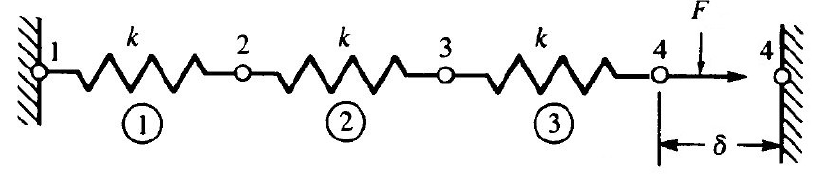

In [169]:
import numpy as np
import copy

MN = np.array([[0, 1, 2, 3]]).reshape(-1, 1)     #Matriz de nodos-vector columna

MC = np.array([[0, 1],     
               [1, 2],
               [2, 3],
              ])
glxn = 1                                         #Grados de libertar por nodo. En este caso: 1
n_nodos = int(len(MN[:,]))


#Fuerzas y desplazamientos
K = [200e3, 200e3, 200e3]          #Tods los resortes tienen la misma K [N/m]
delta = 0.02                       #desplazamiento nodo 3[m]
F_e = np.array([[-1, 0, 0, -1]]).reshape(-1)
u_e = np.array([[0, -1, -1, delta]]).reshape(-1)           #-1 corresponde a incognita

#Matriz de rigidez
M_dim = n_nodos*glxn
MK = np.zeros([M_dim, M_dim])
for i in range(M_dim):
    for j in range(M_dim):
        if i==0 and j==0:
            MK[i, j] = K[i]
            MK[i, j+1] = K[i]
        elif i==M_dim-1 and j==M_dim-1:
            MK[i, j] = K[i-1]
            MK[i, j-1] = -K[i-1]
            
for i in range(1, M_dim-1):      #Parte central de la matriz
    for j in range(1, M_dim-1):       
        MK[j, j-1] = -K[i-1]
        MK[j, j] = K[i-1] + K[i]
        MK[j, j+1] = -K[i]

        

Ecuaciones para cada uno de los nodos:
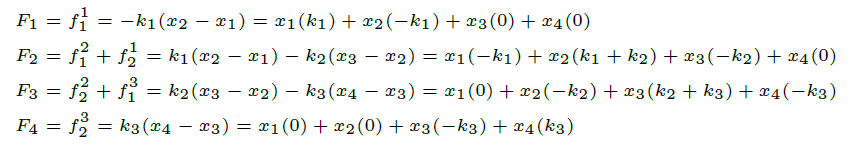

In [170]:
#Indices de los grados de libertad incognita: donde no conocemos los desplazamientos en la lista u_e

u_inc = [i for i, u in enumerate(u_e.tolist(), start=0) if u==-1]      #Indices de las incognitas de desplazamiento
u_con = [i for i in range(n_nodos) if i not in u_ind]                  #Indices de los desplazamientos conocidos

#Armo la matriz reducida y de vinculos.

r = u_inc
s = u_con

u_tot = np.zeros((4,1))
F_tot = np.zeros((4,1))

u_e[r] = np.linalg.solve(MK[np.ix_(r, r)], 
                        (F_e[r] - np.dot(MK[np.ix_(r, s)], u_e[s]))
                         )

F_e[s] = np.dot(MK[np.ix_(s, r)],u_e[r])

In [174]:
u_e

array([0.        , 0.00666667, 0.01333333, 0.02      ])

In [194]:
F_e


array([ 1333,     0,     0, -2666])